In [1]:
import pandas as pd
import statsmodels.api as sm
# Create a sample dataframe
df = pd.read_csv('Clean_Data_07-05.csv')


In [2]:
df

Date    Price             Status  Build Year  \
0       2018-10-29  1845000  Solgt, Fri handel        1933   
1       2017-07-06  1400000  Solgt, Fri handel        1933   
2       2019-06-25  3225000  Solgt, Fri handel        2006   
3       2023-05-02  2600000  Solgt, Fri handel        1935   
4       2016-08-21  2995000  Solgt, Fri handel        1914   
...            ...      ...                ...         ...   
112199  2019-01-29  3675000  Solgt, Fri handel        1969   
112200  2018-01-16  4150000  Solgt, Fri handel        1964   
112201  2015-02-11  3460000  Solgt, Fri handel        2001   
112202  2015-01-23  2700000  Solgt, Fri handel        1970   
112203  2022-05-04  4415000  Solgt, Fri handel        1976   

                                                      URL  \
0       https://www.boligsiden.dk/adresse/elmelundevej...   
1       https://www.boligsiden.dk/adresse/elmelundevej...   
2       https://www.boligsiden.dk/adresse/weidekampsga...   
3       https://www.boligsiden.dk/adresse/vestbanevej-...   
4       https://www.boligsiden.dk/adresse/lemnosvej-22...   
...                                                   ...   
112199  https://www.boligsiden.dk/adresse/syvhoejvaeng...   
112200  https://www.boligsiden.dk/adresse/hyttebovej-3...   
112201  https://www.boligsiden.dk/adresse/nordmarksvae...   
112202  https://www.boligsiden.dk/adresse/syvhoejvaeng...   
112203  https://www.boligsiden.dk/adresse/vallensbaek-...   

                                                Adresse  \
0                 Elmelundevej 22, 1. th. 2700 Brønshøj   
1                 Elmelundevej 22, 1. th. 2700 Brønshøj   
2             Weidekampsgade 57, 5. 3. 2300 København S   
3                     Vestbanevej 15, 4. th. 2500 Valby   
4                Lemnosvej 22, st. tv. 2300 København S   
...                                                 ...   
112199                   Syvhøjvænge 34 2625 Vallensbæk   
112200             Hyttebovej 33 2665 Vallensbæk Strand   
112201                Nordmarksvænge 77 2625 Vallensbæk   
112202                   Syvhøjvænge 20 2625 Vallensbæk   
112203  Vallensbæk Strandvej 291 2665 Vallensbæk Strand   

                         Kort adresse   Kvdm   Latitude  Longitude  ...  \
0                     Elmelundevej 22   60.0  55.702660  12.496368  ...   
1                     Elmelundevej 22   60.0  55.702660  12.496368  ...   
2                   Weidekampsgade 57   67.0  55.667245  12.581967  ...   
3                      Vestbanevej 15   65.0  55.664748  12.521148  ...   
4                        Lemnosvej 22   85.0  55.652880  12.622464  ...   
...                               ...    ...        ...        ...  ...   
112199            Syvhøjvænge 34 2625  186.0  55.645060  12.370012  ...   
112200             Hyttebovej 33 2665  138.0  55.621099  12.398445  ...   
112201         Nordmarksvænge 77 2625  130.0  55.646676  12.370577  ...   
112202            Syvhøjvænge 20 2625  227.0  55.644262  12.370488  ...   
112203  Vallensbæk Strandvej 291 2665  140.0  55.617967  12.385268  ...   

       Værelser 2022  Rudersdal  Lyngby-Taarbak  Frederiksberg  Villa  \
0           2.0  0.0        0.0             0.0            0.0    0.0   
1           2.0  0.0        0.0             0.0            0.0    0.0   
2           2.0  0.0        0.0             0.0            0.0    0.0   
3           2.0  0.0        0.0             0.0            0.0    0.0   
4           4.0  0.0        0.0             0.0            0.0    0.0   
...         ...  ...        ...             ...            ...    ...   
112199      6.0  0.0        0.0             0.0            0.0    1.0   
112200      5.0  0.0        0.0             0.0            0.0    1.0   
112201      5.0  0.0        0.0             0.0            0.0    1.0   
112202      6.0  0.0        0.0             0.0            0.0    1.0   
112203      5.0  1.0        0.0             0.0            0.0    1.0   

        Natural_log_Price_per_kvdm  Albertslund  

In [3]:
pd.set_option('display.max_columns', None)
# df

In [4]:
import statsmodels.api as sm

# Select all columns except 'Date'
X = sm.add_constant(df.drop(columns=['Date', 'Price', 'Status', 'Build Year', 'URL', 'Adresse', 'Kort adresse', 'Kvdm', 'Latitude', 'Longitude', 
                                     'Kommune', 'Type', 'Price_per_kvdm', 'Price_million', 'Year', 'Natural_log_Price', 'Natural_log_Price_per_kvdm'
                                    ,'Toiletter', 'Nearest_Metro_Distance', 'Nearest_Tog_Distance']))

# Fit OLS model
model = sm.OLS(df['Natural_log_Price_per_kvdm'], X)
results = model.fit()

# Print the regression summary
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Natural_log_Price_per_kvdm   R-squared:                       0.519
Model:                                    OLS   Adj. R-squared:                  0.518
Method:                         Least Squares   F-statistic:                     3661.
Date:                        Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                                11:36:28   Log-Likelihood:                -7692.8
No. Observations:                      112204   AIC:                         1.545e+04
Df Residuals:                          112170   BIC:                         1.578e+04
Df Model:                                  33                                         
Covariance Type:                    nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.5264      0.006   1907.654      0.000      10.516      10.537
Distance_to_rådhus       -0.0378      0.000    -81.773      0.000      -0.039      -0.037
Hvidovre                 -0.3301      0.005    -69.400      0.000      -0.339      -0.321
2023                      0.3551      0.007     52.150      0.000       0.342       0.368
Tarnby                   -0.2806      0.005    -57.088      0.000      -0.290      -0.271
Brøndby                  -0.3574      0.008    -47.000      0.000      -0.372      -0.342
Vallensbak               -0.2661      0.008    -35.102      0.000      -0.281      -0.251
Greve                    -0.0058      0.009     -0.632      0.527      -0.024       0.012
2018                      0.2132      0.003     67.939      0.000       0.207       0.219
2017                      0.1680      0.003     55.877      0.000       0.162       0.174
Dummy_30m             -5.348e-15   1.92e-16    -27.869      0.000   -5.72e-15   -4.97e-15
Gladsaxe                 -0.1100      0.005    -23.703      0.000      -0.119      -0.101
2019                      0.2306      0.003     72.754      0.000       0.224       0.237
Herlev                   -0.2691      0.008    -34.855      0.000      -0.284      -0.254
Furesø                    0.0603      0.008      7.272      0.000       0.044       0.077
2021                      0.3695      0.007     55.766      0.000       0.357       0.382
2020                      0.2491      0.006     43.564      0.000       0.238       0.260
Ballerup                 -0.1725      0.007    -25.379      0.000      -0.186      -0.159
Gentofte                  0.0860      0.004     20.876      0.000       0.078       0.094
Badeværelser             -0.0293      0.002    -13.425      0.000      -0.034      -0.025
Rødovre                  -0.2838      0.005    -54.711      0.000      -0.294      -0.274
Etager                   -0.0417      0.004    -10.009      0.000      -0.050      -0.034
Glostrup                 -0.3118      0.007    -44.659      0.000      -0.326      -0.298
2016                      0.0909      0.003     30.177      0.000       0.085       0.097
Rækkehus                  0.1998      0.004     53.372      0.000       0.192       0.207
After corona lockdown     0.0494      0.006      8.433      0.000       0.038       0.061
KælderAreal               0.0013   2.66e-05     47.266      0.000       0.001       0.001
Værelser                  0.0055      0.001      7.254      0.000       0.004       0.007
2022                      0.3856      0.007     56.047      0.000       0.372       0.399
Rudersdal                 0.2269      0.008     29.802      0.000       0.212       0.242
Lyngby-Taarbak           

## Residuals

In [5]:
# Fit OLS model
model = sm.OLS(df['Natural_log_Price_per_kvdm'], X)
results = model.fit()

# Get residuals
residuals = results.resid

# Print the first few residuals
# print(residuals.head())

## Pooled OLS

In [6]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'df' is your pre-loaded DataFrame with the correct columns

# Select the columns that will be used as independent variables
# Make sure to include the 'After corona lockdown' dummy variable
X = sm.add_constant(df.drop(columns=['Date', 'Price', 'Status', 'Build Year', 'URL', 'Adresse', 'Kort adresse', 'Kvdm', 'Latitude', 'Longitude', 
                                     'Kommune', 'Type', 'Price_per_kvdm', 'Price_million', 'Year', 'Natural_log_Price', 'Natural_log_Price_per_kvdm'
                                    ,'Toiletter', 'Nearest_Metro_Distance', 'Nearest_Tog_Distance']))

########################################################################################

# denne video er god til at forstå pooled OLS
# https://www.youtube.com/watch?v=CwcNyXDvznE&ab_channel=BenLambert


# List of municipalities and property types
municipalities = [
    'Albertslund', 'Ballerup', 'Brøndby', 'Frederiksberg', 'Furesø',
    'Gentofte', 'Gladsaxe', 'Glostrup', 'Greve', 'Herlev',
    'Hvidovre', 'Ishøj', 'Lyngby-Taarbak', 'Rudersdal', 'Rødovre',
    'Tarnby', 'Vallensbak'
]

# Add interaction terms for each municipality with the 'After corona lockdown' dummy
for mun in municipalities:
    X[f'{mun}_ld_int'] = df[mun] * df['After corona lockdown']
#########################################################################################

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Natural_log_Price_per_kvdm']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Natural_log_Price_per_kvdm   R-squared:                       0.520
Model:                                    OLS   Adj. R-squared:                  0.519
Method:                         Least Squares   F-statistic:                     2427.
Date:                        Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                                11:36:29   Log-Likelihood:                -7564.4
No. Observations:                      112204   AIC:                         1.523e+04
Df Residuals:                          112153   BIC:                         1.572e+04
Df Model:                                  50                                         
Covariance Type:                    nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.5246      0.006   1896.108      0.000      10.514      10.535
Distance_to_rådhus       -0.0378      0.000    -81.831      0.000      -0.039      -0.037
Hvidovre                 -0.3470      0.006    -61.133      0.000      -0.358      -0.336
2023                      0.3540      0.007     52.035      0.000       0.341       0.367
Tarnby                   -0.2797      0.006    -46.592      0.000      -0.291      -0.268
Brøndby                  -0.3530      0.009    -38.864      0.000      -0.371      -0.335
Vallensbak               -0.2677      0.009    -30.414      0.000      -0.285      -0.250
Greve                     0.0020      0.010      0.210      0.834      -0.017       0.021
2018                      0.2128      0.003     67.875      0.000       0.207       0.219
2017                      0.1678      0.003     55.840      0.000       0.162       0.174
Dummy_30m              2.593e-14   8.19e-16     31.662      0.000    2.43e-14    2.75e-14
Gladsaxe                 -0.1074      0.005    -20.018      0.000      -0.118      -0.097
2019                      0.2304      0.003     72.722      0.000       0.224       0.237
Herlev                   -0.2622      0.009    -28.013      0.000      -0.280      -0.244
Furesø                    0.0722      0.009      7.823      0.000       0.054       0.090
2021                      0.3689      0.007     55.732      0.000       0.356       0.382
2020                      0.2486      0.006     43.520      0.000       0.237       0.260
Ballerup                 -0.1586      0.008    -20.643      0.000      -0.174      -0.144
Gentofte                  0.1079      0.005     22.777      0.000       0.099       0.117
Badeværelser             -0.0295      0.002    -13.504      0.000      -0.034      -0.025
Rødovre                  -0.2923      0.006    -46.779      0.000      -0.305      -0.280
Etager                   -0.0416      0.004     -9.987      0.000      -0.050      -0.033
Glostrup                 -0.3180      0.008    -38.009      0.000      -0.334      -0.302
2016                      0.0906      0.003     30.128      0.000       0.085       0.097
Rækkehus                  0.1999      0.004     53.462      0.000       0.193       0.207
After corona lockdown     0.0559      0.006      9.055      0.000       0.044       0.068
KælderAreal               0.0013   2.66e-05     47.196      0.000       0.001       0.001
Værelser                  0.0054      0.001      7.206      0.000       0.004       0.007
2022                      0.3848      0.007     55.978      0.000       0.371       0.398
Rudersdal                 0.2172      0.008     26.704      0.000       0.201       0.233
Lyngby-Taarbak           

In [7]:
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg


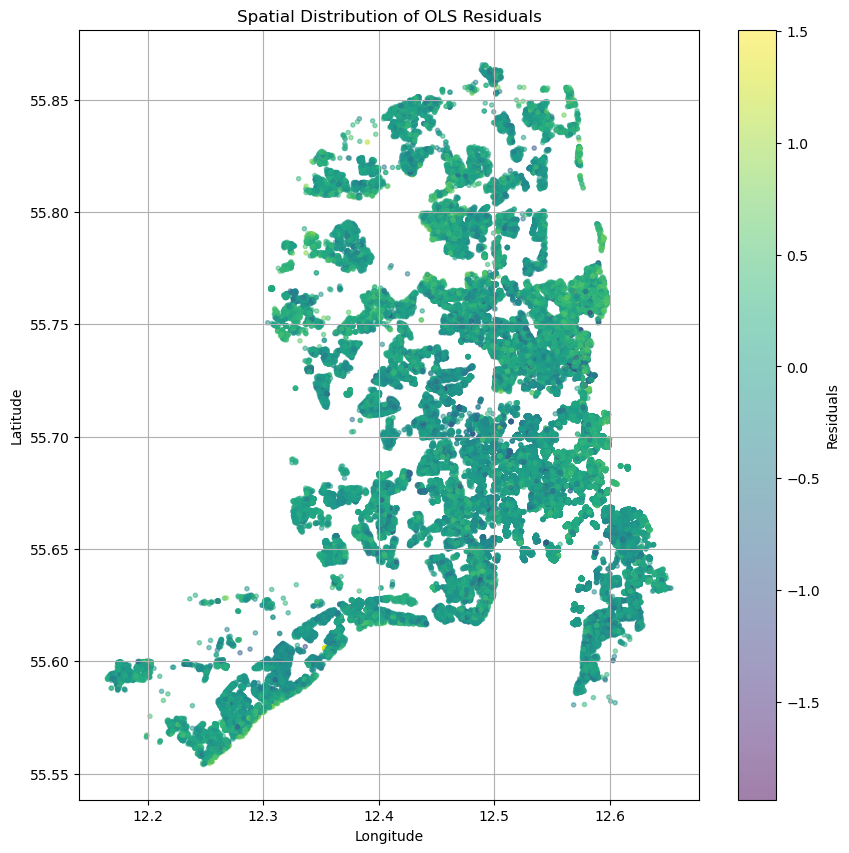

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and model is your fitted OLS model from statsmodels
df['residuals'] = model.resid

# Plot setup
plt.figure(figsize=(10, 10))
plt.scatter(df['Longitude'], df['Latitude'], c=df['residuals'], cmap='viridis', alpha=0.5, marker='.')
plt.colorbar(label='Residuals')
plt.title('Spatial Distribution of OLS Residuals')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Binning the data
num_cells_lon = 120
num_cells_lat = 120
lon_bins = np.linspace(df['Longitude'].min(), df['Longitude'].max(), num_cells_lon + 1)
lat_bins = np.linspace(df['Latitude'].min(), df['Latitude'].max(), num_cells_lat + 1)
df['lon_bin'] = np.digitize(df['Longitude'], lon_bins) - 1
df['lat_bin'] = np.digitize(df['Latitude'], lat_bins) - 1
df['lon_bin'] = df['lon_bin'].clip(0, num_cells_lon - 1)
df['lat_bin'] = df['lat_bin'].clip(0, num_cells_lat - 1)

# Aggregating residuals
aggregated_residuals = df.groupby(['lon_bin', 'lat_bin'])['residuals'].mean().reset_index()

# Assuming you set up the NW analysis to use these aggregated residuals
# This part will depend on your specific requirements and setup for the NW analysis


In [9]:
# Calculate the center longitude and latitude for each grid cell
df['lon_center'] = (lon_bins[df['lon_bin']] + lon_bins[df['lon_bin'] + 1]) / 2
df['lat_center'] = (lat_bins[df['lat_bin']] + lat_bins[df['lat_bin'] + 1]) / 2

# Aggregate residuals for each grid cell
aggregated_residuals = df.groupby(['lon_bin', 'lat_bin']).agg({
    'residuals': 'mean',
    'lon_center': 'first',  # No need to average centers as they are constant for the bin
    'lat_center': 'first'
}).reset_index()

# Now use the aggregated_residuals with lon_center and lat_center in the NW regression


In [10]:
aggregated_residuals

lon_bin  lat_bin  residuals  lon_center  lat_center
0           0       13   0.188829   12.167011   55.589036
1           0       14   0.126003   12.167011   55.591632
2           0       15   0.020044   12.167011   55.594228
3           1       13   0.118241   12.171078   55.589036
4           1       14  -0.038501   12.171078   55.591632
...       ...      ...        ...         ...         ...
3728      118       31   0.095167   12.646976   55.635766
3729      118       32   0.153817   12.646976   55.638362
3730      118       33   0.157765   12.646976   55.640958
3731      119       30  -0.047496   12.651044   55.633170
3732      119       31   0.177730   12.651044   55.635766

[3733 rows x 5 columns]

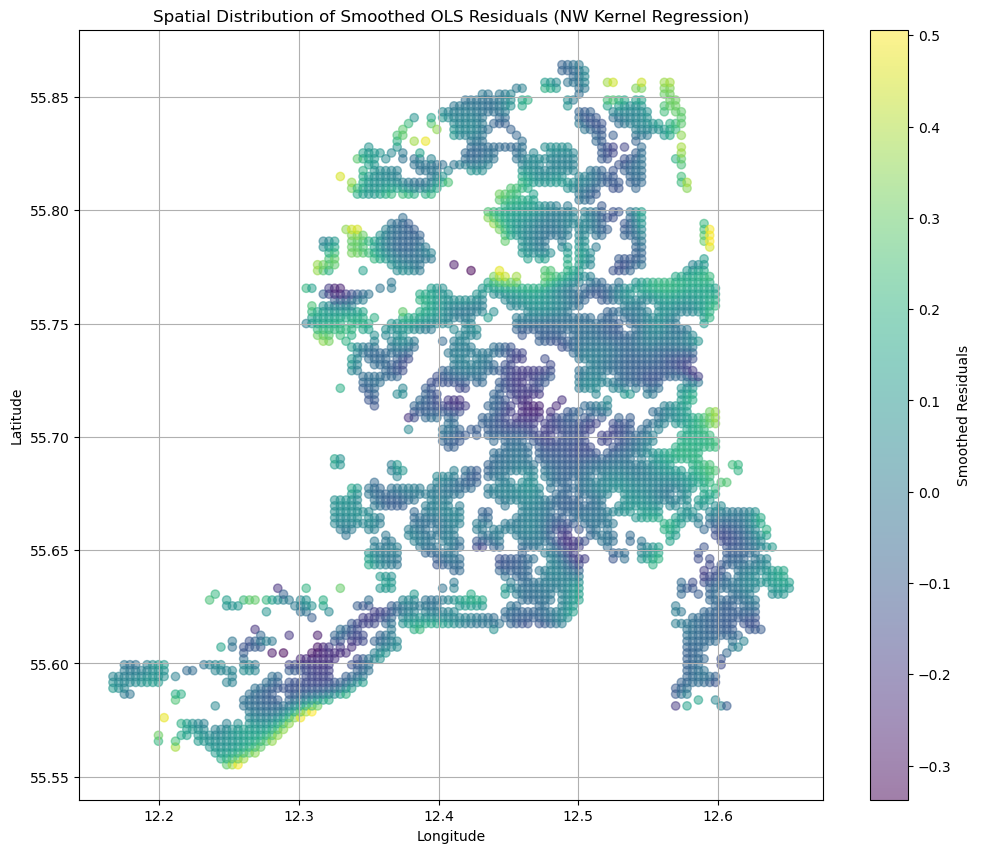

In [11]:
# Ensure statsmodels is updated to the latest version to avoid any compatibility issues.
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg

# Prepare the data for the NW analysis, which includes only the non-empty grid cells
X_nw = aggregated_residuals[['lon_center', 'lat_center']]
y_nw = aggregated_residuals['residuals']

# Note that KernelReg expects a 2D array for independent variables (exog)
X_nw = X_nw.values
y_nw = y_nw.values

# Fit the Nadaraya-Watson kernel regression model
# 'll' indicates two continuous variables (longitude and latitude)
# The bandwidth can be specified manually or selected using cross-validation methods
# Here we choose 'cv_ls' for least squares cross-validation
nw_model = KernelReg(endog=y_nw, exog=X_nw, var_type='cc', bw='cv_ls')
nw_fit = nw_model.fit(X_nw)

# Extract the fitted values, which are the smoothed residuals
smoothed_residuals = nw_fit[0]

# Add the smoothed residuals back to the aggregated_residuals DataFrame
aggregated_residuals['smoothed_residuals'] = smoothed_residuals

# Visualizing the smoothed residuals over space
plt.figure(figsize=(12, 10))
sc = plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
                 c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='Smoothed Residuals')
plt.title('Spatial Distribution of Smoothed OLS Residuals (NW Kernel Regression)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [12]:
# Create a fine grid for interpolation
num_fine = 300
fine_grid_x, fine_grid_y = np.mgrid[
    aggregated_residuals['lon_center'].min():aggregated_residuals['lon_center'].max():complex(0, num_fine),
    aggregated_residuals['lat_center'].min():aggregated_residuals['lat_center'].max():complex(0, num_fine)
]
fine_grid_points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T

# Predict on the fine grid (may take some time)
nw_fitted_values_fine = nw_model.fit(fine_grid_points)[0]


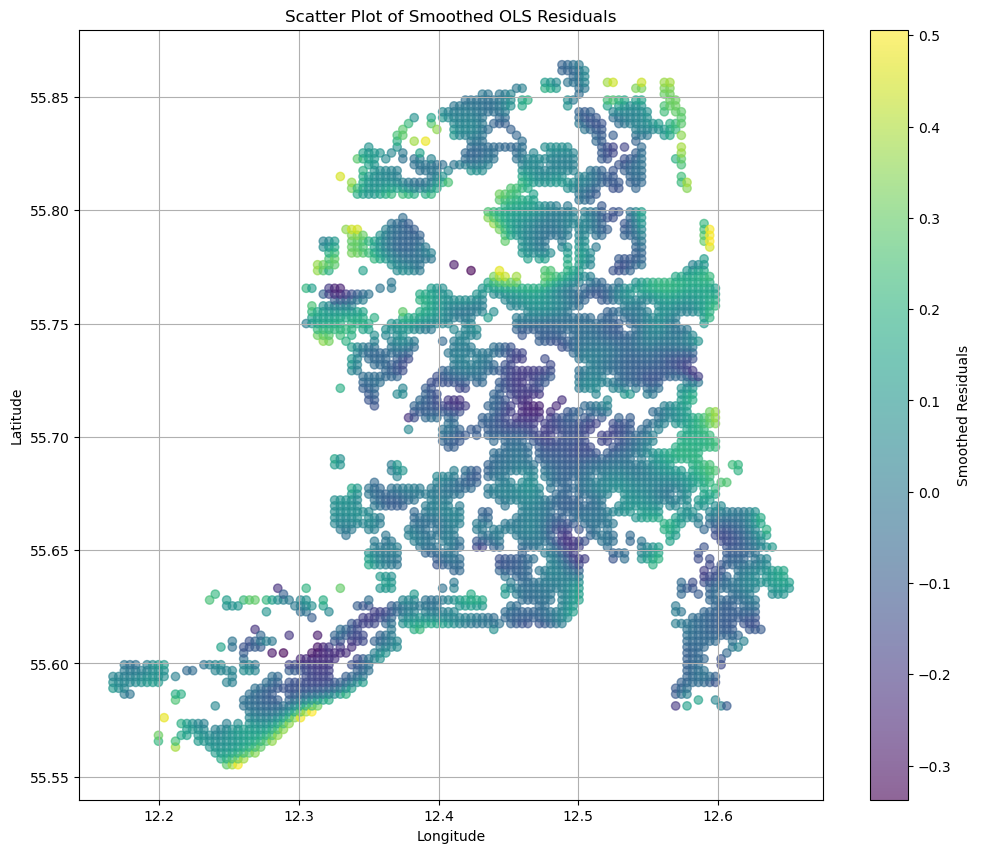

In [13]:
import matplotlib.pyplot as plt

# Plot the smoothed residuals over the original data points
plt.figure(figsize=(12, 10))
plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
            c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Smoothed Residuals')
plt.title('Scatter Plot of Smoothed OLS Residuals')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


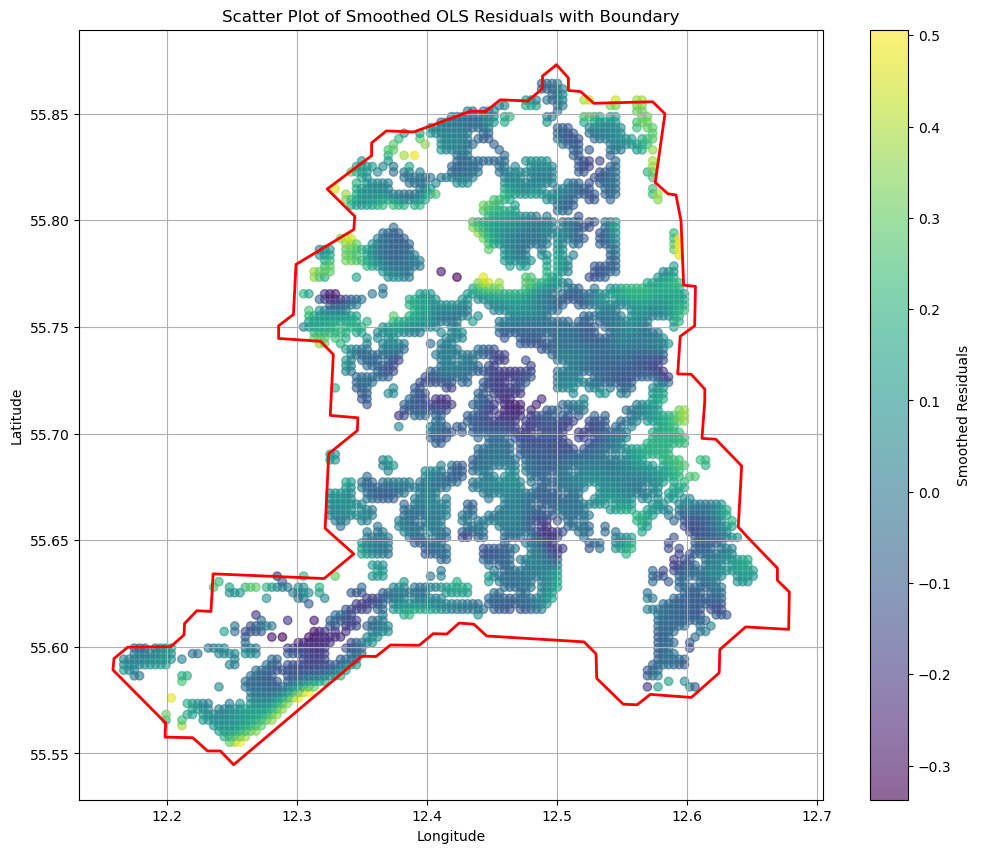

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Given 'aggregated_residuals' and the plot you've already generated with it:

# Plot the smoothed residuals over the original data points
plt.figure(figsize=(12, 10))
plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
            c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.6)

# Plot the boundary
boundary_coords = np.array([[12.19925103, 55.56430001],
       [12.15875853, 55.58919064],
       [12.15954479, 55.59452229],
       [12.17015933, 55.59985322],
       [12.20318234, 55.60007533],
       [12.21340375, 55.60562758],
       [12.21379688, 55.610957  ],
       [12.22323203, 55.61695173],
       [12.23412302, 55.6166142 ],
       [12.23575938, 55.63424765],
       [12.32112167, 55.63204551],
       [12.34392327, 55.64358389],
       [12.32190793, 55.65556246],
       [12.32465985, 55.69058982],
       [12.34667519, 55.70144637],
       [12.34706832, 55.70742726],
       [12.32583924, 55.70853473],
       [12.32819803, 55.73709666],
       [12.31836975, 55.74329339],
       [12.286133  , 55.74462113],
       [12.286133  , 55.75059541],
       [12.2975338 , 55.75590511],
       [12.29949946, 55.77934766],
       [12.34392327, 55.79570486],
       [12.34470953, 55.80189228],
       [12.32348046, 55.81470595],
       [12.35762711, 55.83035443],
       [12.35762711, 55.83632493],
       [12.36888367, 55.8419434 ],
       [12.39014608, 55.84147522],
       [12.43401282, 55.85123987],
       [12.4454127 , 55.85105704],
       [12.45648687, 55.85654175],
       [12.47765808, 55.85599331],
       [12.48873225, 55.86166011],
       [12.48905796, 55.8676916 ],
       [12.49980642, 55.87299123],
       [12.50892632, 55.8667778 ],
       [12.50892632, 55.86092896],
       [12.51837194, 55.86038058],
       [12.52846898, 55.85489641],
       [12.57374279, 55.85562768],
       [12.5831884 , 55.84996   ],
       [12.57569705, 55.81776654],
       [12.58546838, 55.81245937],
       [12.59165689, 55.81191032],
       [12.59556542, 55.799646  ],
       [12.59751968, 55.76960958],
       [12.60663959, 55.76905991],
       [12.60598817, 55.75055009],
       [12.594914  , 55.74560043],
       [12.59295973, 55.72799655],
       [12.60338248, 55.72781314],
       [12.61380523, 55.72084271],
       [12.61380523, 55.71533886],
       [12.61162704, 55.69779017],
       [12.62227371, 55.69735422],
       [12.64214207, 55.68487021],
       [12.63953639, 55.65621538],
       [12.64865629, 55.65015108],
       [12.66964429, 55.63693963],
       [12.66964429, 55.63119412],
       [12.6788049 , 55.62573512],
       [12.67829598, 55.60820369],
       [12.64521597, 55.60935353],
       [12.62536796, 55.59871621],
       [12.62485904, 55.58778838],
       [12.60348426, 55.57628212],
       [12.57193102, 55.57772059],
       [12.56175256, 55.57282959],
       [12.55106517, 55.57311731],
       [12.53070824, 55.58519977],
       [12.53019932, 55.59670341],
       [12.52097763, 55.60233897],
       [12.44606412, 55.60509895],
       [12.4362928 , 55.61061832],
       [12.42489292, 55.61117021],
       [12.4154473 , 55.6060189 ],
       [12.40502455, 55.60620288],
       [12.39425978, 55.60073275],
       [12.37211863, 55.6008749 ],
       [12.36104806, 55.59547303],
       [12.35021337, 55.59563296],
       [12.25153747, 55.54473202],
       [12.24131606, 55.55118164],
       [12.23148778, 55.55118164],
       [12.22008698, 55.55740786],
       [12.19883189, 55.55766249],
       [12.19925103, 55.56430001]])

# Add the boundary to the plot. Close the loop by repeating the first point at the end.
boundary_loop = np.vstack([boundary_coords, boundary_coords[0]])
plt.plot(boundary_loop[:, 0], boundary_loop[:, 1], c='red', linewidth=2)

plt.colorbar(label='Smoothed Residuals')
plt.title('Scatter Plot of Smoothed OLS Residuals with Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


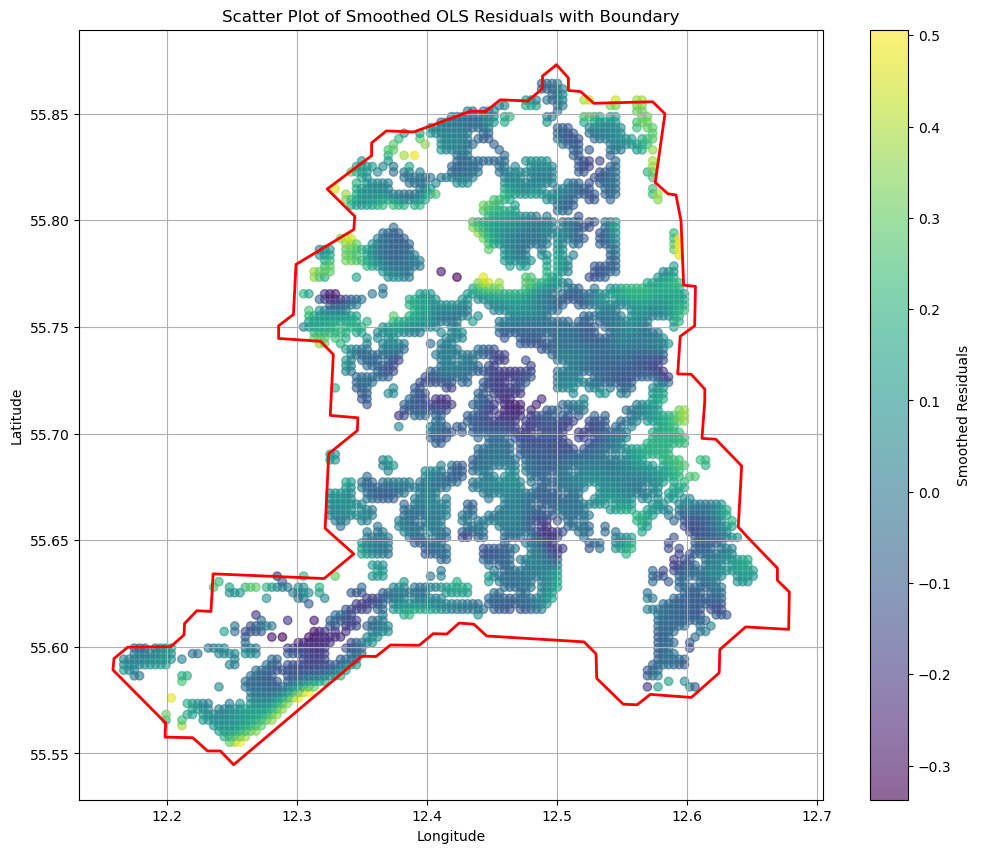

In [20]:
import matplotlib.path as mpath
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'aggregated_residuals' and 'boundary_coords' are defined as shown above

# Create a matplotlib path object from the boundary coordinates
boundary_path = mpath.Path(boundary_coords)

# Create a fine grid for interpolation
num_fine = 300  # Adjust as needed for the density of your data and desired resolution
fine_grid_x, fine_grid_y = np.mgrid[
    aggregated_residuals['lon_center'].min():aggregated_residuals['lon_center'].max():complex(0, num_fine),
    aggregated_residuals['lat_center'].min():aggregated_residuals['lat_center'].max():complex(0, num_fine)
]
fine_grid_points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T

# Use the path object to check which grid points are within the boundary
inside_mask = boundary_path.contains_points(fine_grid_points)

# Reshape the mask to match the grid
inside_mask = inside_mask.reshape(fine_grid_x.shape)

# Mask the grid so that only points inside the boundary are True
# When performing the interpolation, we will only interpolate points where inside_mask is True

# Plotting the boundary over the scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(aggregated_residuals['lon_center'], aggregated_residuals['lat_center'], 
            c=aggregated_residuals['smoothed_residuals'], cmap='viridis', alpha=0.6)
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], c='red', linewidth=2)  # Plot the boundary

# Now you can proceed to interpolate only within this mask.
# If using griddata as previously shown, you would apply the mask after the interpolation is done.

# Your code for interpolation goes here, then apply the inside_mask to the result
# interpolated_data[~inside_mask] = np.nan

plt.colorbar(label='Smoothed Residuals')
plt.title('Scatter Plot of Smoothed OLS Residuals with Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


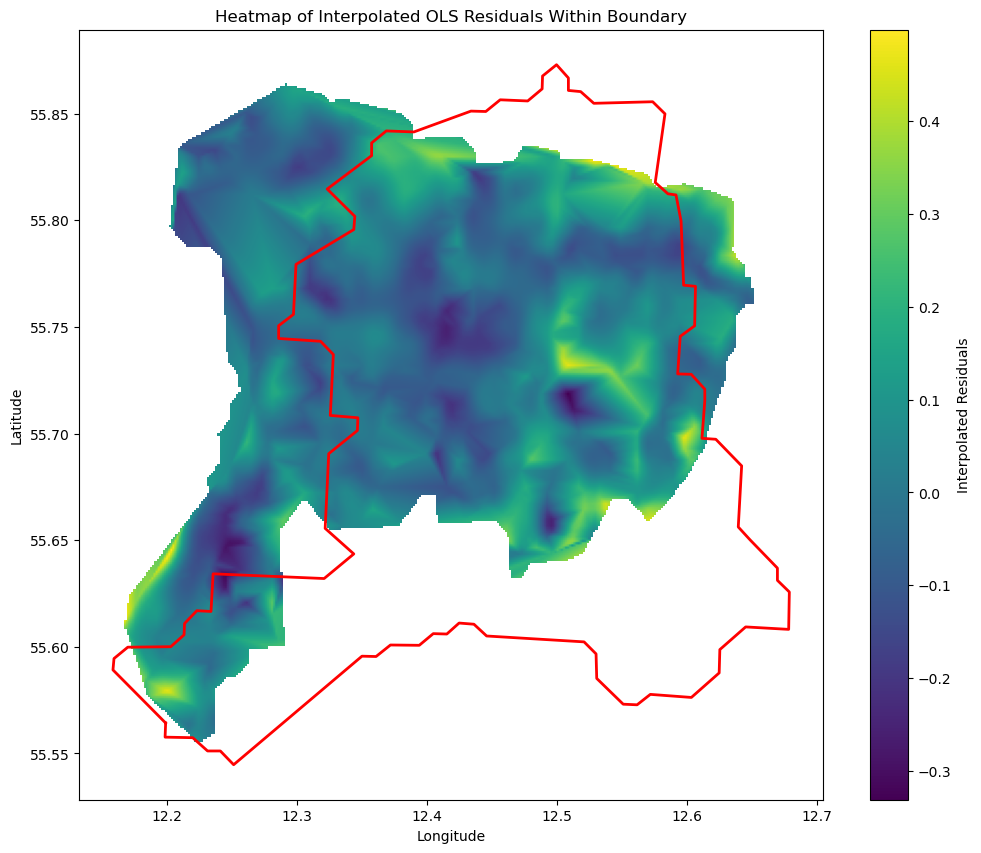

In [21]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath

# Define the boundary coordinates as np.array for the region of interest
boundary_coords = np.array([[12.19925103, 55.56430001],
       [12.15875853, 55.58919064],
       [12.15954479, 55.59452229],
       [12.17015933, 55.59985322],
       [12.20318234, 55.60007533],
       [12.21340375, 55.60562758],
       [12.21379688, 55.610957  ],
       [12.22323203, 55.61695173],
       [12.23412302, 55.6166142 ],
       [12.23575938, 55.63424765],
       [12.32112167, 55.63204551],
       [12.34392327, 55.64358389],
       [12.32190793, 55.65556246],
       [12.32465985, 55.69058982],
       [12.34667519, 55.70144637],
       [12.34706832, 55.70742726],
       [12.32583924, 55.70853473],
       [12.32819803, 55.73709666],
       [12.31836975, 55.74329339],
       [12.286133  , 55.74462113],
       [12.286133  , 55.75059541],
       [12.2975338 , 55.75590511],
       [12.29949946, 55.77934766],
       [12.34392327, 55.79570486],
       [12.34470953, 55.80189228],
       [12.32348046, 55.81470595],
       [12.35762711, 55.83035443],
       [12.35762711, 55.83632493],
       [12.36888367, 55.8419434 ],
       [12.39014608, 55.84147522],
       [12.43401282, 55.85123987],
       [12.4454127 , 55.85105704],
       [12.45648687, 55.85654175],
       [12.47765808, 55.85599331],
       [12.48873225, 55.86166011],
       [12.48905796, 55.8676916 ],
       [12.49980642, 55.87299123],
       [12.50892632, 55.8667778 ],
       [12.50892632, 55.86092896],
       [12.51837194, 55.86038058],
       [12.52846898, 55.85489641],
       [12.57374279, 55.85562768],
       [12.5831884 , 55.84996   ],
       [12.57569705, 55.81776654],
       [12.58546838, 55.81245937],
       [12.59165689, 55.81191032],
       [12.59556542, 55.799646  ],
       [12.59751968, 55.76960958],
       [12.60663959, 55.76905991],
       [12.60598817, 55.75055009],
       [12.594914  , 55.74560043],
       [12.59295973, 55.72799655],
       [12.60338248, 55.72781314],
       [12.61380523, 55.72084271],
       [12.61380523, 55.71533886],
       [12.61162704, 55.69779017],
       [12.62227371, 55.69735422],
       [12.64214207, 55.68487021],
       [12.63953639, 55.65621538],
       [12.64865629, 55.65015108],
       [12.66964429, 55.63693963],
       [12.66964429, 55.63119412],
       [12.6788049 , 55.62573512],
       [12.67829598, 55.60820369],
       [12.64521597, 55.60935353],
       [12.62536796, 55.59871621],
       [12.62485904, 55.58778838],
       [12.60348426, 55.57628212],
       [12.57193102, 55.57772059],
       [12.56175256, 55.57282959],
       [12.55106517, 55.57311731],
       [12.53070824, 55.58519977],
       [12.53019932, 55.59670341],
       [12.52097763, 55.60233897],
       [12.44606412, 55.60509895],
       [12.4362928 , 55.61061832],
       [12.42489292, 55.61117021],
       [12.4154473 , 55.6060189 ],
       [12.40502455, 55.60620288],
       [12.39425978, 55.60073275],
       [12.37211863, 55.6008749 ],
       [12.36104806, 55.59547303],
       [12.35021337, 55.59563296],
       [12.25153747, 55.54473202],
       [12.24131606, 55.55118164],
       [12.23148778, 55.55118164],
       [12.22008698, 55.55740786],
       [12.19883189, 55.55766249],
       [12.19925103, 55.56430001]])

# Prepare your data points and values for interpolation
lon = aggregated_residuals['lon_center'].values
lat = aggregated_residuals['lat_center'].values
residuals = aggregated_residuals['smoothed_residuals'].values

# Create the fine grid for interpolation
num_fine = 300
fine_grid_x, fine_grid_y = np.mgrid[
    lon.min():lon.max():complex(0, num_fine),
    lat.min():lat.max():complex(0, num_fine)
]

# Create the mask using matplotlib's Path
path = mpath.Path(boundary_coords)
points = np.vstack((fine_grid_x.ravel(), fine_grid_y.ravel())).T
mask = path.contains_points(points)
mask = mask.reshape(fine_grid_x.shape)

# Perform the interpolation
interpolated_values = griddata(
    (lon, lat),
    residuals,
    (fine_grid_x, fine_grid_y),
    method='linear'  # You can also try 'cubic' for smoother results
)

# Apply the mask to the interpolated values
interpolated_values[~mask] = np.nan  # Set points outside the boundary to NaN

# Now plot the results
plt.figure(figsize=(12, 10))
plt.imshow(interpolated_values, origin='lower', aspect='auto', 
           extent=(lon.min(), lon.max(), lat.min(), lat.max()),
           cmap='viridis')
plt.colorbar(label='Interpolated Residuals')
plt.title('Heatmap of Interpolated OLS Residuals Within Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Overlay the boundary
boundary_loop = np.vstack([boundary_coords, boundary_coords[0]])
plt.plot(boundary_loop[:, 0], boundary_loop[:, 1], color='red', linewidth=2)

plt.show()


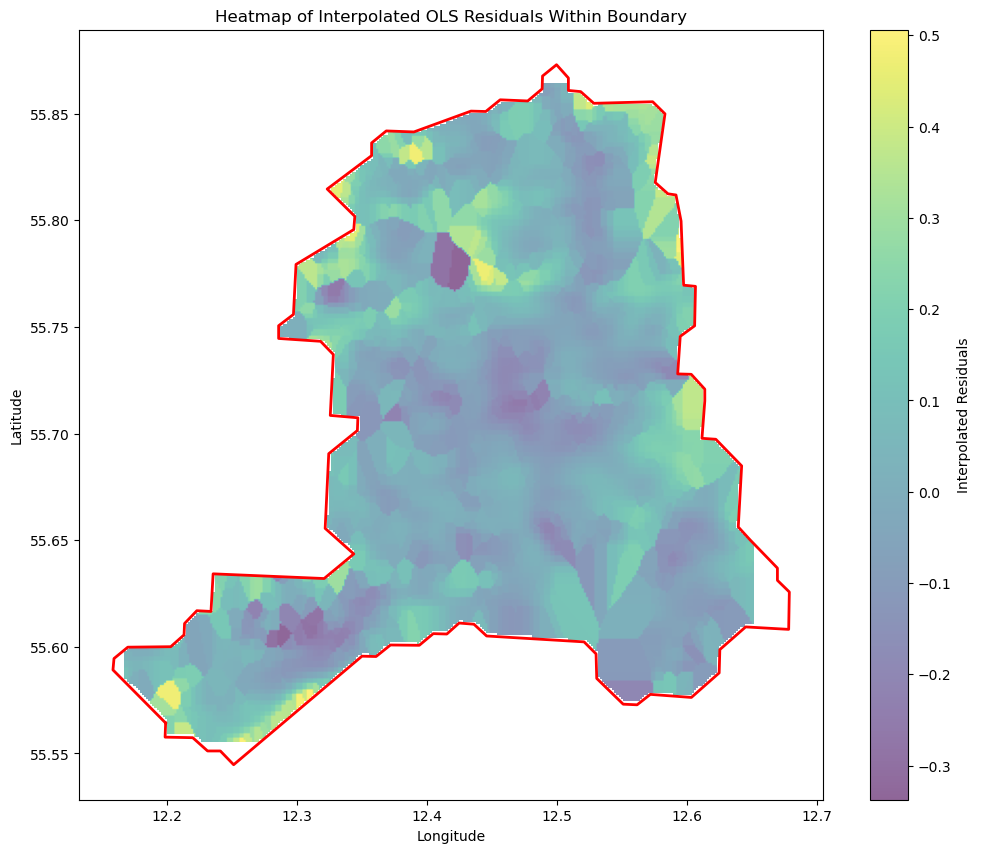

In [22]:
# Perform 'nearest' interpolation
interpolated_nearest = griddata(
    (lon, lat),
    residuals,
    (fine_grid_x, fine_grid_y),
    method='nearest'
)

# Mask out the areas outside the boundary
interpolated_nearest[~inside_mask] = np.nan

# Rotate the interpolated data 90 degrees counterclockwise.
interpolated_nearest_rotated = np.rot90(interpolated_nearest, k=3)  # k=3 rotates 270 degrees counterclockwise
interpolated_nearest_flipped = np.fliplr(interpolated_nearest_rotated)
# Now plot the results with the corrected orientation
plt.figure(figsize=(12, 10))
plt.imshow(interpolated_nearest_flipped, origin='lower', aspect='auto', 
           extent=(lon.min(), lon.max(), lat.min(), lat.max()),
           cmap='viridis', alpha=0.6)
plt.colorbar(label='Interpolated Residuals')
plt.title('Heatmap of Interpolated OLS Residuals Within Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Overlay the boundary with the correct coordinates
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)

plt.show()



In [23]:
boundary_coords = np.array([[12.19925103, 55.56430001],
       [12.15875853, 55.58919064],
       [12.15954479, 55.59452229],
       [12.17015933, 55.59985322],
       [12.20318234, 55.60007533],
       [12.21340375, 55.60562758],
       [12.21379688, 55.610957  ],
       [12.22323203, 55.61695173],
       [12.23412302, 55.6166142 ],
       [12.23575938, 55.63424765],
       [12.32112167, 55.63204551],
       [12.34392327, 55.64358389],
       [12.32190793, 55.65556246],
       [12.32465985, 55.69058982],
       [12.34667519, 55.70144637],
       [12.34706832, 55.70742726],
       [12.32583924, 55.70853473],
       [12.32819803, 55.73709666],
       [12.31836975, 55.74329339],
       [12.286133  , 55.74462113],
       [12.286133  , 55.75059541],
       [12.2975338 , 55.75590511],
       [12.29949946, 55.77934766],
       [12.34392327, 55.79570486],
       [12.34470953, 55.80189228],
       [12.32348046, 55.81470595],
       [12.35762711, 55.83035443],
       [12.35762711, 55.83632493],
       [12.36888367, 55.8419434 ],
       [12.39014608, 55.84147522],
       [12.43401282, 55.85123987],
       [12.4454127 , 55.85105704],
       [12.45648687, 55.85654175],
       [12.47765808, 55.85599331],
       [12.48873225, 55.86166011],
       [12.48905796, 55.8676916 ],
       [12.49980642, 55.87299123],
       [12.50892632, 55.8667778 ],
       [12.50892632, 55.86092896],
       [12.51837194, 55.86038058],
       [12.52846898, 55.85489641],
       [12.57374279, 55.85562768],
       [12.5831884 , 55.84996   ],
       [12.57569705, 55.81776654],
       [12.58546838, 55.81245937],
       [12.59165689, 55.81191032],
       [12.59556542, 55.799646  ],
       [12.59751968, 55.76960958],
       [12.60663959, 55.76905991],
       [12.60598817, 55.75055009],
       [12.594914  , 55.74560043],
       [12.59295973, 55.72799655],
       [12.60338248, 55.72781314],
       [12.61380523, 55.72084271],
       [12.61380523, 55.71533886],
       [12.61162704, 55.69779017],
       [12.62227371, 55.69735422],
       [12.64214207, 55.68487021],
       [12.63953639, 55.65621538],
       [12.64865629, 55.65015108],
       [12.66964429, 55.63693963],
       [12.66964429, 55.63119412],
       [12.6788049 , 55.62573512],
       [12.67829598, 55.60820369],
       [12.64521597, 55.60935353],
       [12.62536796, 55.59871621],
       [12.62485904, 55.58778838],
       [12.60348426, 55.57628212],
       [12.57193102, 55.57772059],
       [12.56175256, 55.57282959],
       [12.55106517, 55.57311731],
       [12.53070824, 55.58519977],
       [12.53019932, 55.59670341],
       [12.52097763, 55.60233897],
       [12.44606412, 55.60509895],
       [12.4362928 , 55.61061832],
       [12.42489292, 55.61117021],
       [12.4154473 , 55.6060189 ],
       [12.40502455, 55.60620288],
       [12.39425978, 55.60073275],
       [12.37211863, 55.6008749 ],
       [12.36104806, 55.59547303],
       [12.35021337, 55.59563296],
       [12.25153747, 55.54473202],
       [12.24131606, 55.55118164],
       [12.23148778, 55.55118164],
       [12.22008698, 55.55740786],
       [12.19883189, 55.55766249],
       [12.19925103, 55.56430001]])


print(boundary_coords)
print("Shape of boundary_coords:", boundary_coords.shape)



[[12.19925103 55.56430001]
 [12.15875853 55.58919064]
 [12.15954479 55.59452229]
 [12.17015933 55.59985322]
 [12.20318234 55.60007533]
 [12.21340375 55.60562758]
 [12.21379688 55.610957  ]
 [12.22323203 55.61695173]
 [12.23412302 55.6166142 ]
 [12.23575938 55.63424765]
 [12.32112167 55.63204551]
 [12.34392327 55.64358389]
 [12.32190793 55.65556246]
 [12.32465985 55.69058982]
 [12.34667519 55.70144637]
 [12.34706832 55.70742726]
 [12.32583924 55.70853473]
 [12.32819803 55.73709666]
 [12.31836975 55.74329339]
 [12.286133   55.74462113]
 [12.286133   55.75059541]
 [12.2975338  55.75590511]
 [12.29949946 55.77934766]
 [12.34392327 55.79570486]
 [12.34470953 55.80189228]
 [12.32348046 55.81470595]
 [12.35762711 55.83035443]
 [12.35762711 55.83632493]
 [12.36888367 55.8419434 ]
 [12.39014608 55.84147522]
 [12.43401282 55.85123987]
 [12.4454127  55.85105704]
 [12.45648687 55.85654175]
 [12.47765808 55.85599331]
 [12.48873225 55.86166011]
 [12.48905796 55.8676916 ]
 [12.49980642 55.87299123]
 

(300, 300)
(300, 300)
(300, 300)


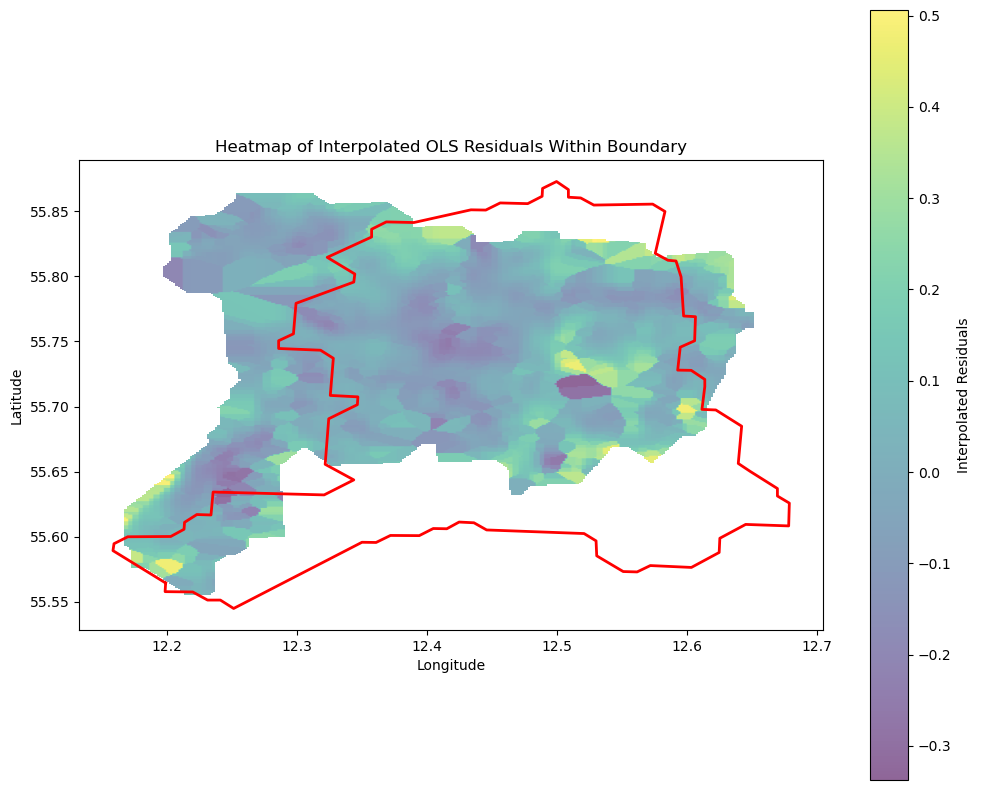

In [24]:
# Assuming interpolated_nearest is your array with interpolated data

# First, let's confirm the shape of your grids
print(fine_grid_x.shape)
print(fine_grid_y.shape)

# Ensure the interpolated data is in the correct shape, matching fine_grid_x and fine_grid_y
print(interpolated_nearest.shape)

# Now plot the results with the corrected orientation
plt.figure(figsize=(12, 10))
plt.imshow(interpolated_nearest, origin='lower', aspect='equal',
           extent=(fine_grid_x.min(), fine_grid_x.max(), fine_grid_y.min(), fine_grid_y.max()),
           cmap='viridis', alpha=0.6)
plt.colorbar(label='Interpolated Residuals')
plt.title('Heatmap of Interpolated OLS Residuals Within Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Overlay the boundary with the correct coordinates
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)

plt.show()


Shape of boundary_coords: (89, 2)


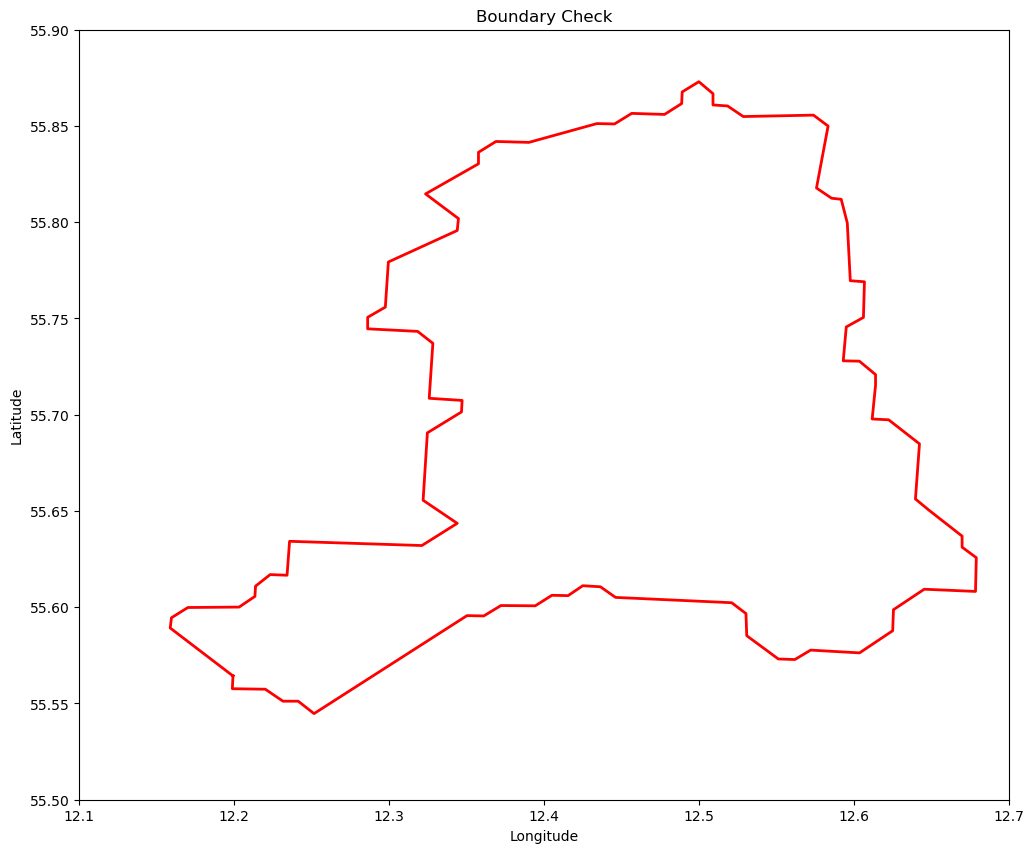

In [25]:
# Make sure boundary_coords is a numpy array with two columns for longitude and latitude
boundary_coords = np.array([[12.19925103, 55.56430001],
       [12.15875853, 55.58919064],
       [12.15954479, 55.59452229],
       [12.17015933, 55.59985322],
       [12.20318234, 55.60007533],
       [12.21340375, 55.60562758],
       [12.21379688, 55.610957  ],
       [12.22323203, 55.61695173],
       [12.23412302, 55.6166142 ],
       [12.23575938, 55.63424765],
       [12.32112167, 55.63204551],
       [12.34392327, 55.64358389],
       [12.32190793, 55.65556246],
       [12.32465985, 55.69058982],
       [12.34667519, 55.70144637],
       [12.34706832, 55.70742726],
       [12.32583924, 55.70853473],
       [12.32819803, 55.73709666],
       [12.31836975, 55.74329339],
       [12.286133  , 55.74462113],
       [12.286133  , 55.75059541],
       [12.2975338 , 55.75590511],
       [12.29949946, 55.77934766],
       [12.34392327, 55.79570486],
       [12.34470953, 55.80189228],
       [12.32348046, 55.81470595],
       [12.35762711, 55.83035443],
       [12.35762711, 55.83632493],
       [12.36888367, 55.8419434 ],
       [12.39014608, 55.84147522],
       [12.43401282, 55.85123987],
       [12.4454127 , 55.85105704],
       [12.45648687, 55.85654175],
       [12.47765808, 55.85599331],
       [12.48873225, 55.86166011],
       [12.48905796, 55.8676916 ],
       [12.49980642, 55.87299123],
       [12.50892632, 55.8667778 ],
       [12.50892632, 55.86092896],
       [12.51837194, 55.86038058],
       [12.52846898, 55.85489641],
       [12.57374279, 55.85562768],
       [12.5831884 , 55.84996   ],
       [12.57569705, 55.81776654],
       [12.58546838, 55.81245937],
       [12.59165689, 55.81191032],
       [12.59556542, 55.799646  ],
       [12.59751968, 55.76960958],
       [12.60663959, 55.76905991],
       [12.60598817, 55.75055009],
       [12.594914  , 55.74560043],
       [12.59295973, 55.72799655],
       [12.60338248, 55.72781314],
       [12.61380523, 55.72084271],
       [12.61380523, 55.71533886],
       [12.61162704, 55.69779017],
       [12.62227371, 55.69735422],
       [12.64214207, 55.68487021],
       [12.63953639, 55.65621538],
       [12.64865629, 55.65015108],
       [12.66964429, 55.63693963],
       [12.66964429, 55.63119412],
       [12.6788049 , 55.62573512],
       [12.67829598, 55.60820369],
       [12.64521597, 55.60935353],
       [12.62536796, 55.59871621],
       [12.62485904, 55.58778838],
       [12.60348426, 55.57628212],
       [12.57193102, 55.57772059],
       [12.56175256, 55.57282959],
       [12.55106517, 55.57311731],
       [12.53070824, 55.58519977],
       [12.53019932, 55.59670341],
       [12.52097763, 55.60233897],
       [12.44606412, 55.60509895],
       [12.4362928 , 55.61061832],
       [12.42489292, 55.61117021],
       [12.4154473 , 55.6060189 ],
       [12.40502455, 55.60620288],
       [12.39425978, 55.60073275],
       [12.37211863, 55.6008749 ],
       [12.36104806, 55.59547303],
       [12.35021337, 55.59563296],
       [12.25153747, 55.54473202],
       [12.24131606, 55.55118164],
       [12.23148778, 55.55118164],
       [12.22008698, 55.55740786],
       [12.19883189, 55.55766249],
       [12.19925103, 55.56430001]])

# Verify the shape of the array
print("Shape of boundary_coords:", boundary_coords.shape)

# Now plot the boundary
plt.figure(figsize=(12, 10))
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)

# Set the axes limits
plt.xlim(12.1, 12.7)
plt.ylim(55.5, 55.9)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Boundary Check')
plt.show()


Extent values: (12.1, 12.7, 55.5, 55.9)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

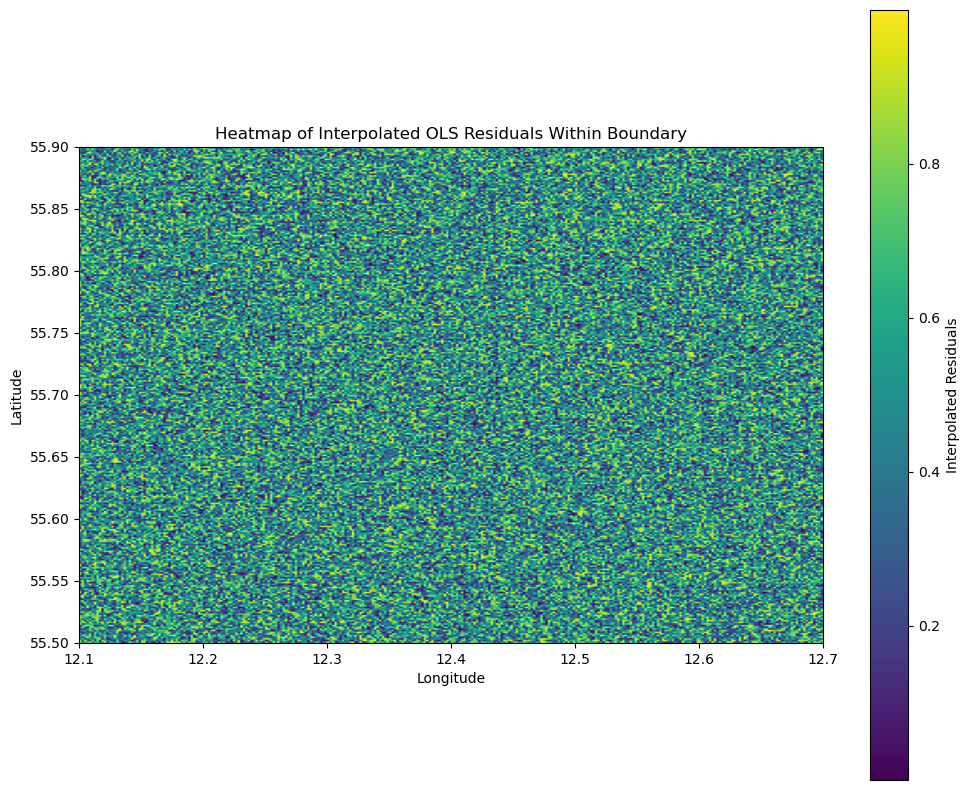

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for aggregated_residuals and their interpolation
lon = np.linspace(12.1, 12.7, 300)
lat = np.linspace(55.5, 55.9, 300)
fine_grid_x, fine_grid_y = np.meshgrid(lon, lat)
interpolated_nearest = np.random.rand(300, 300)  # Replace with your actual data

# Define your boundary coordinates
boundary_coords = np.array([
    # ... your coordinates here
])

# Check the extent values
extent_values = (fine_grid_x.min(), fine_grid_x.max(), fine_grid_y.min(), fine_grid_y.max())
print("Extent values:", extent_values)

# Plot the heatmap with extent to check if it aligns properly
plt.figure(figsize=(12, 10))
plt.imshow(interpolated_nearest, origin='lower', aspect='equal', 
           extent=extent_values, cmap='viridis')
plt.colorbar(label='Interpolated Residuals')
plt.title('Heatmap of Interpolated OLS Residuals Within Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Corrected line for plotting the boundary coordinates
plt.plot(boundary_coords[:, 0], boundary_coords[:, 1], color='red', linewidth=2)


plt.show()
